In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
data = pd.read_csv('Social Media Data for DSBA.csv')

In [372]:
data

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20


In [373]:
data.drop('UserID', axis=1, inplace=True)

In [374]:
data.shape

(11760, 16)

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [376]:
## numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [377]:
##continuous and discrete features
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 35]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['UserID']]

In [378]:
discrete_feature

['week_since_last_outstation_checkin',
 'travelling_network_rating',
 'Adult_flag']

In [379]:
continuous_feature

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'montly_avg_comment_on_company_page',
 'Daily_Avg_mins_spend_on_traveling_page']

In [380]:
## categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['Taken_product',
 'preferred_device',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

In [381]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())

In [382]:
cat

[array(['Yes', 'No'], dtype=object),
 array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
        'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object),
 array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
        '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
        '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object),
 array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object),
 array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
        'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
        'Beach', 'Historical site', 'Big Cities', 'Trekking',
        'Hill Stations'], dtype=object),
 array(['Yes', 'No', nan, '1', '0'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [383]:
data['preferred_device'] = data['preferred_device'].replace(to_replace='ANDROID', value='Android')
data['preferred_device'] = data['preferred_device'].replace(to_replace='Android OS', value='Android')
data['preferred_device'] = data['preferred_device'].replace(to_replace='Others', value='Other')
data['preferred_device'] = data['preferred_device'].replace(to_replace='iOS and Android', value='Mobile')

data['yearly_avg_Outstation_checkins'] = data['yearly_avg_Outstation_checkins'].replace(to_replace='*', value=np.nan)

data['member_in_family'] = data['member_in_family'].replace(to_replace='Three', value='3')

data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Tour  Travel', value='Tour_and_Travel')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Tour and Travel', value='Tour_and_Travel')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Social media', value='Social_media')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Historical site', value='Historical_site')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Big Cities', value='Big_Cities')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Hill Stations', value='Hill_Stations')

data['following_company_page'] = data['following_company_page'].replace(to_replace='0', value='No')
data['following_company_page'] = data['following_company_page'].replace(to_replace='1', value='Yes')

In [384]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())
cat

[array(['Yes', 'No'], dtype=object),
 array(['Mobile', 'iOS', 'Android', nan, 'Other', 'Tab', 'Laptop'],
       dtype=object),
 array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
        '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
        '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object),
 array(['2', '1', '4', '3', '5', '10'], dtype=object),
 array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social_media',
        'Entertainment', 'Tour_and_Travel', 'Movie', 'OTT', 'Beach',
        'Historical_site', 'Big_Cities', 'Trekking', 'Hill_Stations'],
       dtype=object),
 array(['Yes', 'No', nan], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [385]:
# mode
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].mode()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,262.0,24185.0,96.0,2377,1,23,3,0,10


In [386]:
# variance
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].var()

Yearly_avg_view_on_travel_page                  4.648916e+03
total_likes_on_outstation_checkin_given         2.069291e+08
Yearly_avg_comment_on_travel_page               5.772799e+02
total_likes_on_outofstation_checkin_received    2.215221e+07
week_since_last_outstation_checkin              6.845365e+00
montly_avg_comment_on_company_page              2.367845e+03
travelling_network_rating                       1.168317e+00
Adult_flag                                      7.256024e-01
Daily_Avg_mins_spend_on_traveling_page          8.227681e+01
dtype: float64

In [387]:
# skew
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].skew()

Yearly_avg_view_on_travel_page                  0.414409
total_likes_on_outstation_checkin_given         0.489638
Yearly_avg_comment_on_travel_page               4.868225
total_likes_on_outofstation_checkin_received    1.368578
week_since_last_outstation_checkin              0.915334
montly_avg_comment_on_company_page              7.684150
travelling_network_rating                      -0.302557
Adult_flag                                      0.968115
Daily_Avg_mins_spend_on_traveling_page          4.480682
dtype: float64

In [388]:
data

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,Yes,307.0,Mobile,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,Yes,277.0,Mobile,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,No,202.0,Mobile,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,No,279.0,Laptop,30987.0,23,2,Historical_site,58.0,2616,4,No,36,No,3,1,23
11756,No,305.0,Tab,21510.0,6,1,Historical_site,55.0,10041,4,No,30,No,1,1,11
11757,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,No,382.0,Laptop,35851.0,2,3,Historical_site,83.0,5444,3,No,32,No,4,0,20


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11684 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [390]:
data.describe()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


### sns.heatmap(data.corr())

<AxesSubplot:>

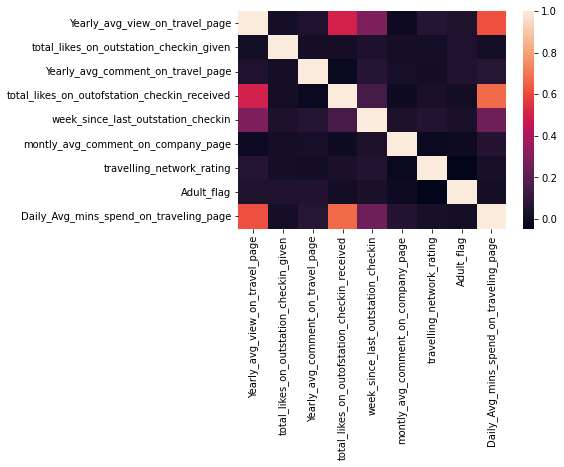

In [391]:
sns.heatmap(data.corr())

### 

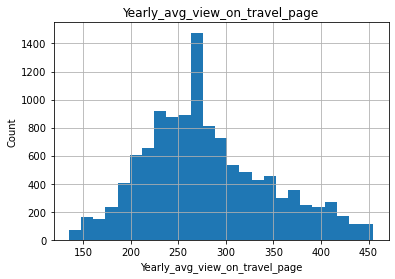

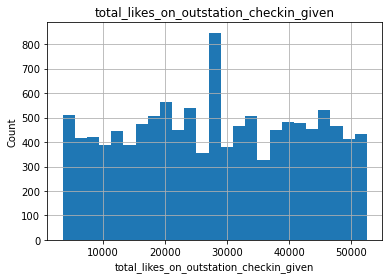

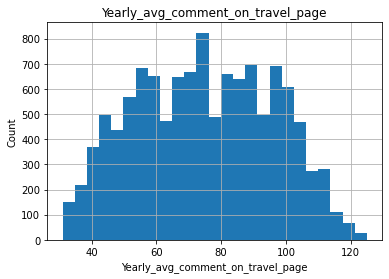

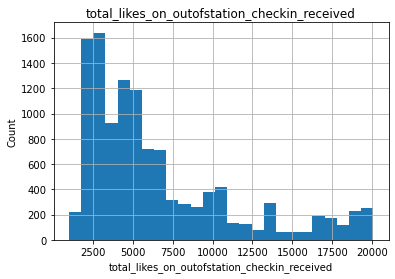

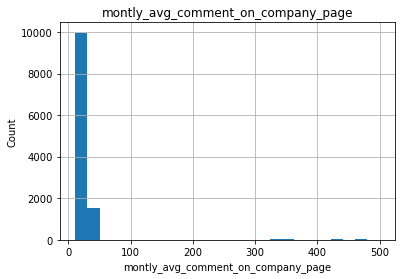

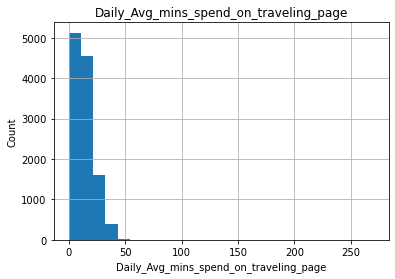

In [449]:
## Univariate analysis

for feature in continuous_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

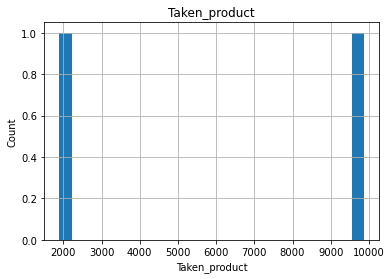

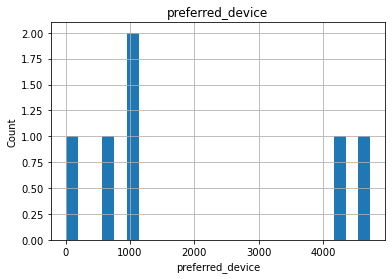

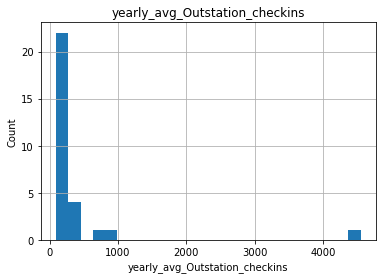

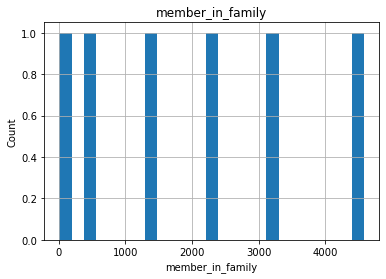

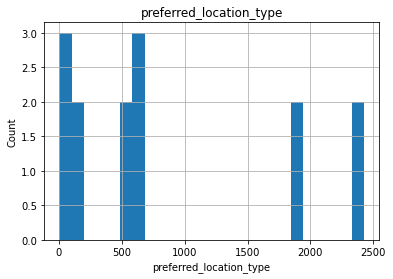

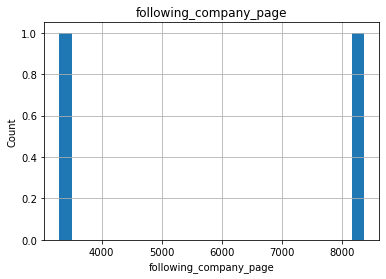

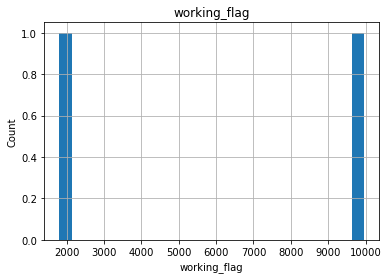

In [393]:
for feature in categorical_feature:
    dataset=data.copy()
    dataset[feature].value_counts().hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

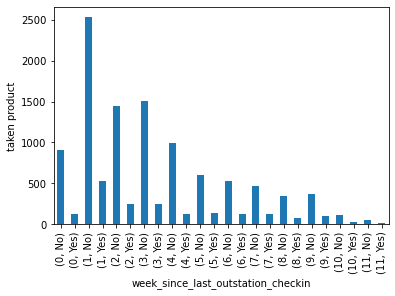

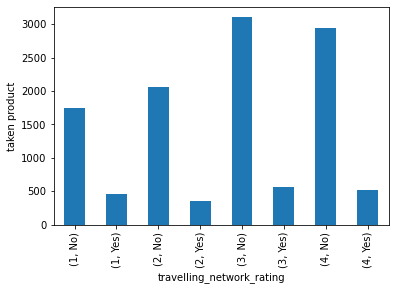

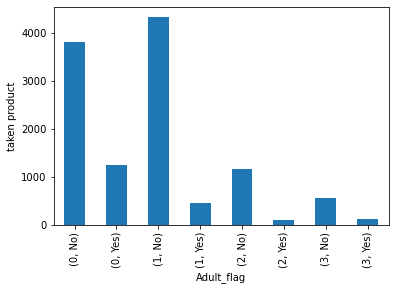

In [394]:
for feature in discrete_feature:
        dataset = data.copy()
        dataset.groupby(feature)['Taken_product'].value_counts().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('taken product')
        plt.show()

In [395]:
for feature in categorical_feature:
    print("Features is {} and categories are {}".format(feature, len(data[feature].unique())))  

Features is Taken_product and categories are 2
Features is preferred_device and categories are 7
Features is yearly_avg_Outstation_checkins and categories are 30
Features is member_in_family and categories are 6
Features is preferred_location_type and categories are 15
Features is following_company_page and categories are 3
Features is working_flag and categories are 2


In [396]:
## missing values are < 75%. We will impute the missing values. We will impute numerical values using mean, and categorical values using mode.

In [397]:
data.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [398]:
data.isnull().sum() * 100 / len(data)

Taken_product                                   0.000000
Yearly_avg_view_on_travel_page                  4.940476
preferred_device                                0.450680
total_likes_on_outstation_checkin_given         3.239796
yearly_avg_Outstation_checkins                  0.646259
member_in_family                                0.000000
preferred_location_type                         0.263605
Yearly_avg_comment_on_travel_page               1.751701
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
following_company_page                          0.875850
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
Adult_flag                                      0.000000
Daily_Avg_mins_spend_on_traveling_page          0.000000
dtype: float64

In [399]:
data['Yearly_avg_view_on_travel_page'] = data['Yearly_avg_view_on_travel_page'].fillna(data['Yearly_avg_view_on_travel_page'].median())
data['total_likes_on_outstation_checkin_given'] = data['total_likes_on_outstation_checkin_given'].fillna(data['total_likes_on_outstation_checkin_given'].median())
data['preferred_device'] = data['preferred_device'].fillna(data['preferred_device'].mode)
data['yearly_avg_Outstation_checkins'] = data['yearly_avg_Outstation_checkins'].fillna(data['yearly_avg_Outstation_checkins'].mode)
data['preferred_location_type'] = data['preferred_location_type'].fillna(data['preferred_location_type'].mode)
data['Yearly_avg_comment_on_travel_page'] = data['Yearly_avg_comment_on_travel_page'].fillna(data['Yearly_avg_comment_on_travel_page'].median())
data['following_company_page'] = data['following_company_page'].fillna(data['following_company_page'].mode)


In [400]:
data.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11760 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [404]:
## Handling outliers

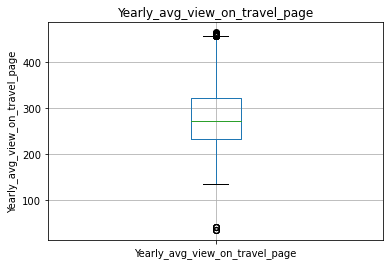

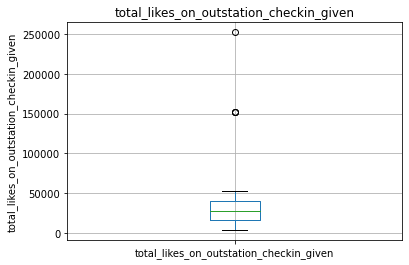

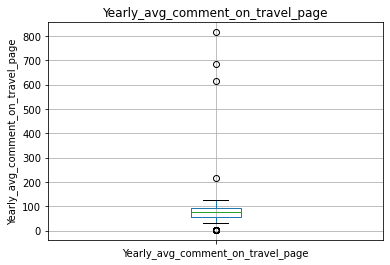

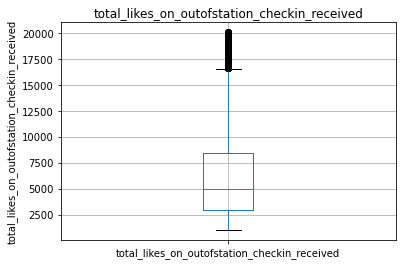

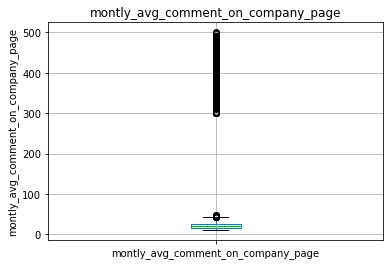

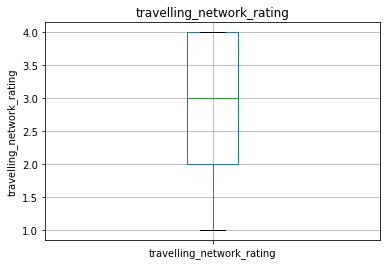

In [405]:
## outliers

for feature in numerical_feature:
    if 0 in data[feature].unique():
        pass
    else:
        #df[feature]=np.log(df[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [406]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(data['Yearly_avg_comment_on_travel_page'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 215.0, 615.0, 685.0, 815.0]


In [407]:
q1 = np.percentile(data['Yearly_avg_view_on_travel_page'], 25)
q3 = np.percentile(data['Yearly_avg_view_on_travel_page'], 75)

In [408]:
IQR = q3 - q1

In [409]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

In [410]:
data.drop(data[ (data.Yearly_avg_view_on_travel_page > upr_bound) | (data.Yearly_avg_view_on_travel_page < lwr_bound) ].index , inplace=True)

In [411]:
q11 = np.percentile(data['total_likes_on_outstation_checkin_given'], 25)
q33 = np.percentile(data['total_likes_on_outstation_checkin_given'], 75)

In [412]:
IQR1 = q33 - q11

In [413]:
lwr_bound1 = q11-(1.5*IQR1)
upr_bound1 = q33+(1.5*IQR1)

In [414]:
data.drop(data[ (data.total_likes_on_outstation_checkin_given > upr_bound1) | (data.total_likes_on_outstation_checkin_given < lwr_bound1) ].index , inplace=True)

In [415]:
q111 = np.percentile(data['Yearly_avg_comment_on_travel_page'], 25)
q333 = np.percentile(data['Yearly_avg_comment_on_travel_page'], 75)

In [416]:
IQR2 = q333 - q111

In [417]:
lwr_bound2 = q111-(1.5*IQR2)
upr_bound2 = q333+(1.5*IQR2)

In [418]:
data.drop(data[ (data.Yearly_avg_comment_on_travel_page > upr_bound2) | (data.Yearly_avg_comment_on_travel_page < lwr_bound2) ].index , inplace=True)

In [419]:
data

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,Yes,307.0,Mobile,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,Yes,277.0,Mobile,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,No,202.0,Mobile,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,No,279.0,Laptop,30987.0,23,2,Historical_site,58.0,2616,4,No,36,No,3,1,23
11756,No,305.0,Tab,21510.0,6,1,Historical_site,55.0,10041,4,No,30,No,1,1,11
11757,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,No,382.0,Laptop,35851.0,2,3,Historical_site,83.0,5444,3,No,32,No,4,0,20


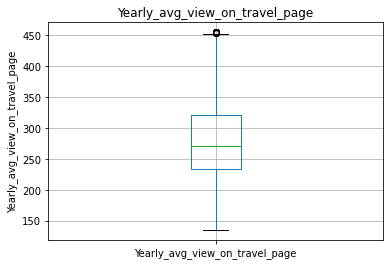

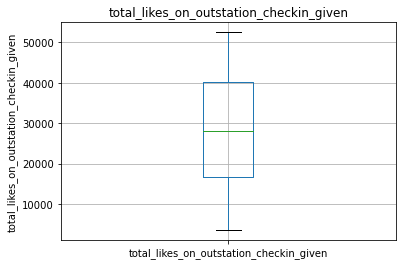

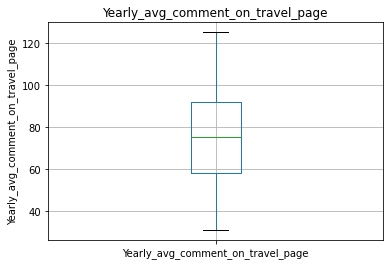

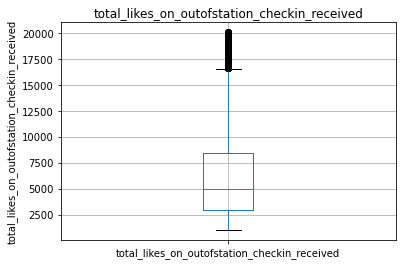

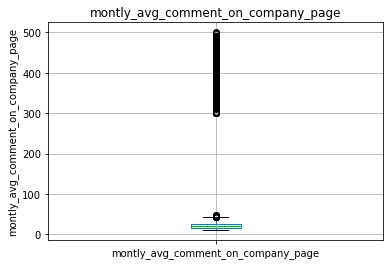

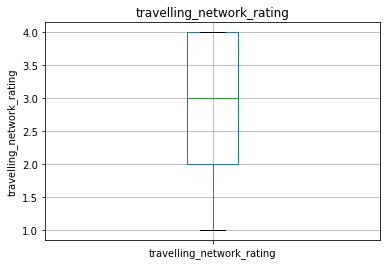

In [420]:
## outliers

for feature in numerical_feature:
    if 0 in data[feature].unique():
        pass
    else:
        #df[feature]=np.log(df[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [421]:
# laptop = df_out.loc[df_out['preferred_device'] == 'Laptop']

In [422]:
# laptop

In [423]:
# mobile = df_out.loc[df_out['preferred_device'] != 'Laptop']

In [424]:
# mobile

In [425]:
# ## one hot encoding for laptop

# obj = laptop[['Taken_product',
#  'preferred_device',
#  'yearly_avg_Outstation_checkins',
#  'member_in_family',
#  'preferred_location_type',
#  'following_company_page',
#  'working_flag']]
# num = laptop.drop(['Taken_product',
#  'preferred_device',
#  'yearly_avg_Outstation_checkins',
#  'member_in_family',
#  'preferred_location_type',
#  'following_company_page',
#  'working_flag'], axis = 1)
# encode = pd.get_dummies(obj, drop_first = True)
# laptop_1 = pd.concat([num, encode], axis = 1)

In [428]:
data["yearly_avg_Outstation_checkins"] = data["yearly_avg_Outstation_checkins"].astype(object).astype(str)

In [433]:
data["preferred_location_type"] = data["preferred_location_type"].astype(object).astype(str)

In [434]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['yearly_avg_Outstation_checkins']= label_encoder.fit_transform(data['yearly_avg_Outstation_checkins'])
data['preferred_location_type']= label_encoder.fit_transform(data['preferred_location_type'])

In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11687 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11687 non-null  object 
 1   Yearly_avg_view_on_travel_page                11687 non-null  float64
 2   preferred_device                              11687 non-null  object 
 3   total_likes_on_outstation_checkin_given       11687 non-null  float64
 4   yearly_avg_Outstation_checkins                11687 non-null  int64  
 5   member_in_family                              11687 non-null  object 
 6   preferred_location_type                       11687 non-null  int32  
 7   Yearly_avg_comment_on_travel_page             11687 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11687 non-null  int64  
 9   week_since_last_outstation_checkin            11687 non-null 

In [437]:
## one hot encoding for mobile

obj = data[['Taken_product',
 'preferred_device',
 'member_in_family',
 'following_company_page',
 'working_flag']]
num = data.drop(['Taken_product',
 'preferred_device',
 'member_in_family',
 'following_company_page',
 'working_flag'], axis = 1)
encode = pd.get_dummies(obj, drop_first = True)
df = pd.concat([num, encode], axis = 1)

In [439]:
df

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,...,preferred_device_Tab,preferred_device_iOS,member_in_family_10,member_in_family_2,member_in_family_3,member_in_family_4,member_in_family_5,following_company_page_No,following_company_page_Yes,working_flag_Yes
0,307.0,38570.0,0,4,94.0,5993,8,11,1,0,...,0,0,0,1,0,0,0,0,1,0
1,367.0,9765.0,0,4,61.0,5130,1,23,4,1,...,0,1,0,0,0,0,0,1,0,1
2,277.0,48055.0,0,11,92.0,2090,6,15,2,0,...,0,0,0,1,0,0,0,0,1,0
3,247.0,48720.0,0,4,56.0,2909,1,11,3,0,...,0,1,0,0,0,1,0,0,1,0
4,202.0,20685.0,0,8,40.0,3468,9,12,4,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,279.0,30987.0,15,7,58.0,2616,4,36,3,1,...,0,0,0,1,0,0,0,1,0,0
11756,305.0,21510.0,25,7,55.0,10041,4,30,1,1,...,1,0,0,0,0,0,0,1,0,0
11757,214.0,5478.0,23,1,103.0,6203,3,40,2,1,...,1,0,0,0,1,0,0,0,1,1
11758,382.0,35851.0,11,7,83.0,5444,3,32,4,0,...,0,0,0,0,1,0,0,1,0,0


In [440]:
## Checking for multicolinearity

In [442]:
# Import library for VIF for mobile
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = mobile_1.columns
    vif["VIF"] = [variance_inflation_factor(mobile_1.values, i) for i in range(mobile_1.shape[1])]

    return(vif)

In [443]:
X = df.drop(['Taken_product_Yes'], axis = 1)
calc_vif(X)

,variables,VIF
0,Yearly_avg_view_on_travel_page,31.126346
1,total_likes_on_outstation_checkin_given,5.098292
2,yearly_avg_Outstation_checkins,2.332029
3,preferred_location_type,3.334952
4,Yearly_avg_comment_on_travel_page,13.705246
5,total_likes_on_outofstation_checkin_received,5.588726
6,week_since_last_outstation_checkin,2.827811
7,montly_avg_comment_on_company_page,1.505957
8,travelling_network_rating,7.322175
9,Adult_flag,1.929399


In [84]:
#df[['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating']] = np.log(df[['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating']])

In [444]:
# pd.set_option("display.max_columns", None)

In [450]:
feature_scale=[feature for feature in df.columns if feature not in ['Taken_product_Yes']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])
scaler.transform(df[feature_scale])

array([[0.5375    , 0.71517604, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.725     , 0.12658616, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.44375   , 0.90898874, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.246875  , 0.03898731, 0.79310345, ..., 0.        , 1.        ,
        1.        ],
       [0.771875  , 0.65961707, 0.37931034, ..., 1.        , 0.        ,
        0.        ],
       [0.421875  , 0.37710211, 0.93103448, ..., 1.        , 0.        ,
        0.        ]])

In [451]:
# transform the train and test set, and add on the Id and SalePrice variables
df = pd.concat([df[['Taken_product_Yes']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [452]:
df.to_csv('new_data.csv',index=False)

In [453]:
## Feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [454]:
df_new = pd.read_csv('new_data.csv')

In [455]:
df_new

,Taken_product_Yes,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,...,preferred_device_Tab,preferred_device_iOS,member_in_family_10,member_in_family_2,member_in_family_3,member_in_family_4,member_in_family_5,following_company_page_No,following_company_page_Yes,working_flag_Yes
0,1,0.537500,0.715176,0.000000,0.285714,0.670213,0.261545,0.727273,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.725000,0.126586,0.000000,0.285714,0.319149,0.216257,0.090909,0.024540,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,0.443750,0.908989,0.000000,0.785714,0.648936,0.056728,0.545455,0.008180,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.350000,0.922577,0.000000,0.285714,0.265957,0.099706,0.090909,0.000000,0.666667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0.209375,0.349721,0.000000,0.571429,0.095745,0.129041,0.818182,0.002045,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,0,0.450000,0.560228,0.517241,0.500000,0.287234,0.084330,0.363636,0.051125,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11683,0,0.531250,0.366579,0.862069,0.500000,0.255319,0.473971,0.363636,0.038855,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11684,0,0.246875,0.038987,0.793103,0.071429,0.765957,0.272565,0.272727,0.059305,0.333333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
11685,0,0.771875,0.659617,0.379310,0.500000,0.553191,0.232735,0.272727,0.042945,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [456]:
## Choose dependent and independent variable
y = df_new[['Taken_product_Yes']]
X = df_new.drop(['Taken_product_Yes'],axis=1)

In [457]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [458]:
feature_sel_model.get_support()

array([ True,  True, False, False, False,  True,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False,  True,  True, False])

In [459]:
# The selected features from the total features

selected_feature = X.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feature)))

total features: 25
selected features: 12


In [460]:
selected_feature

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'travelling_network_rating',
       'Adult_flag', 'preferred_device_Laptop', 'preferred_device_Mobile',
       'preferred_device_iOS', 'member_in_family_3',
       'following_company_page_No', 'following_company_page_Yes'],
      dtype='object')

In [461]:
X = X[selected_feature]

In [462]:
X

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,travelling_network_rating,Adult_flag,preferred_device_Laptop,preferred_device_Mobile,preferred_device_iOS,member_in_family_3,following_company_page_No,following_company_page_Yes
0,0.537500,0.715176,0.261545,0.727273,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
1,0.725000,0.126586,0.216257,0.090909,1.000000,0.333333,0.0,0.0,1.0,0.0,1.0,0.0
2,0.443750,0.908989,0.056728,0.545455,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
3,0.350000,0.922577,0.099706,0.090909,0.666667,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
4,0.209375,0.349721,0.129041,0.818182,1.000000,0.333333,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11682,0.450000,0.560228,0.084330,0.363636,0.666667,0.333333,1.0,0.0,0.0,0.0,1.0,0.0
11683,0.531250,0.366579,0.473971,0.363636,0.000000,0.333333,0.0,0.0,0.0,0.0,1.0,0.0
11684,0.246875,0.038987,0.272565,0.272727,0.333333,0.333333,0.0,0.0,0.0,1.0,0.0,1.0
11685,0.771875,0.659617,0.232735,0.272727,1.000000,0.000000,1.0,0.0,0.0,1.0,1.0,0.0


In [463]:
from sklearn.model_selection import train_test_split

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [521]:
X_train

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,travelling_network_rating,Adult_flag,preferred_device_Laptop,preferred_device_Mobile,preferred_device_iOS,member_in_family_3,following_company_page_No,following_company_page_Yes
2015,0.425000,0.874660,0.112301,0.727273,0.333333,0.333333,0.0,1.0,0.0,0.0,1.0,0.0
1885,0.303125,0.419093,0.553526,0.818182,0.666667,0.333333,0.0,1.0,0.0,1.0,1.0,0.0
5226,0.240625,0.770919,0.117181,0.272727,0.666667,1.000000,0.0,1.0,0.0,0.0,1.0,0.0
5786,0.331250,0.095078,0.068587,0.181818,0.333333,0.333333,0.0,1.0,0.0,0.0,1.0,0.0
9581,0.278125,0.480762,0.091835,0.272727,1.000000,0.333333,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.375000,0.713930,0.150976,0.909091,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
5191,0.212500,0.070210,0.082651,0.272727,0.666667,0.333333,0.0,1.0,0.0,1.0,1.0,0.0
5390,0.496875,0.351356,0.141268,0.363636,0.333333,0.000000,0.0,0.0,0.0,1.0,0.0,1.0
860,0.350000,0.010728,0.092989,0.000000,0.333333,0.333333,0.0,1.0,0.0,1.0,1.0,0.0


In [522]:
from sklearn.linear_model import LogisticRegression

In [523]:
y_train.isnull().sum()

Taken_product_Yes    0
dtype: int64

In [524]:
X_train.isnull().sum()

Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
travelling_network_rating                       0
Adult_flag                                      0
preferred_device_Laptop                         0
preferred_device_Mobile                         0
preferred_device_iOS                            0
member_in_family_3                              0
following_company_page_No                       0
following_company_page_Yes                      0
dtype: int64

In [525]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [526]:
y_pred=model.predict(X_test)

In [527]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1942,   33],
       [ 294,   69]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

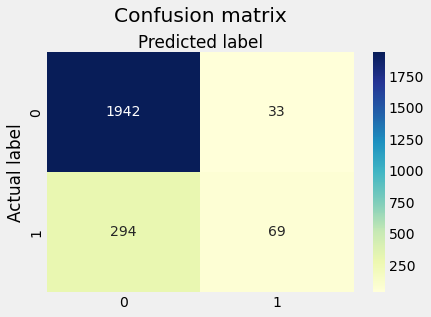

In [528]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [529]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1975
           1       0.68      0.19      0.30       363

    accuracy                           0.86      2338
   macro avg       0.77      0.59      0.61      2338
weighted avg       0.84      0.86      0.83      2338



In [530]:
## We can't proceed with the model as recall and precision is very low.

In [531]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

AUC: 0.773


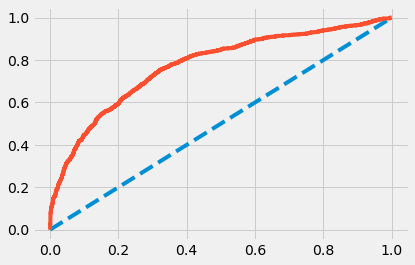

In [532]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [533]:
## LDA

In [534]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [535]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [536]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8481120975505402
[[7643  179]
 [1241  286]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7822
           1       0.62      0.19      0.29      1527

    accuracy                           0.85      9349
   macro avg       0.74      0.58      0.60      9349
weighted avg       0.82      0.85      0.81      9349



the auc 0.770 


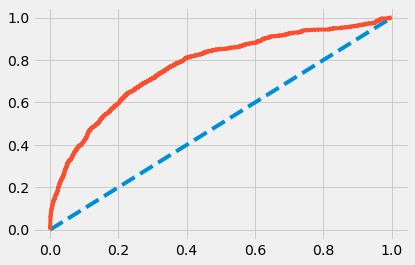

In [537]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [538]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8601368691189051
[[1931   44]
 [ 283   80]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1975
           1       0.65      0.22      0.33       363

    accuracy                           0.86      2338
   macro avg       0.76      0.60      0.63      2338
weighted avg       0.84      0.86      0.83      2338



the auc curve 0.782 


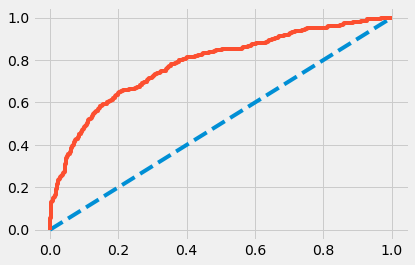

In [539]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [540]:
## Naive bayes

In [541]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [542]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [543]:
Y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)

print(model_score)
print(metrics.confusion_matrix(y_train,Y_train_predict))
print(metrics.classification_report(y_train,Y_train_predict))

0.8118515349235212
[[6903  919]
 [ 840  687]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7822
           1       0.43      0.45      0.44      1527

    accuracy                           0.81      9349
   macro avg       0.66      0.67      0.66      9349
weighted avg       0.82      0.81      0.81      9349



the auc 0.750 


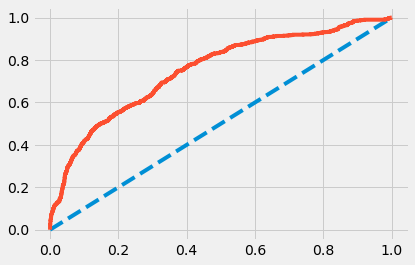

In [544]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [545]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)

print(model_score)
print(metrics.confusion_matrix(y_test,Y_test_predict))
print(metrics.classification_report(y_test,Y_test_predict))

0.8284858853721129
[[1762  213]
 [ 188  175]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1975
           1       0.45      0.48      0.47       363

    accuracy                           0.83      2338
   macro avg       0.68      0.69      0.68      2338
weighted avg       0.83      0.83      0.83      2338



the auc curve 0.756 


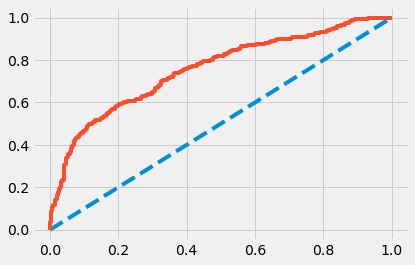

In [546]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [547]:
## KNN

In [548]:
x1 = df_new.drop("Taken_product_Yes",axis=1)
y1 = df_new["Taken_product_Yes"]

In [549]:
from scipy.stats import zscore

In [550]:
x1[x1.columns] = x1[x1.columns].apply(zscore)

In [551]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1, shuffle = False)

In [552]:
from sklearn.neighbors import KNeighborsClassifier

In [553]:
for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train1, y_train1)
    scores=knn.score(x_test1,y_test1)
    print('Neighbours:',k,'; Accuracy:',scores)

Neighbours: 1 ; Accuracy: 0.9996577686516085
Neighbours: 3 ; Accuracy: 0.9996577686516085
Neighbours: 5 ; Accuracy: 0.8887748117727584
Neighbours: 7 ; Accuracy: 0.8891170431211499
Neighbours: 9 ; Accuracy: 0.8812457221081451
Neighbours: 11 ; Accuracy: 0.87782340862423
Neighbours: 13 ; Accuracy: 0.8723477070499658
Neighbours: 15 ; Accuracy: 0.8726899383983573
Neighbours: 17 ; Accuracy: 0.8675564681724846
Neighbours: 19 ; Accuracy: 0.8685831622176592


In [554]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train1,y_train1)

y_train_predict = KNN_model.predict(x_train1)
KNN_model_score = KNN_model.score(x_train1,y_train1)

print(KNN_model_score)
print(metrics.confusion_matrix(y_train1,y_train_predict))
print(metrics.classification_report(y_train1,y_train_predict))

0.9412435824301197
[[7240  107]
 [ 408 1010]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7347
           1       0.90      0.71      0.80      1418

    accuracy                           0.94      8765
   macro avg       0.93      0.85      0.88      8765
weighted avg       0.94      0.94      0.94      8765



the auc 0.973 


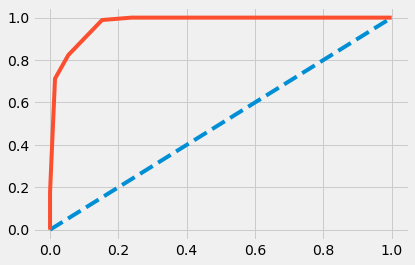

In [555]:
probs_train=KNN_model.predict_proba(x_train1)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train1,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train1,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [556]:
y_test_predict=KNN_model.predict(x_test1)

KNN_model_score=KNN_model.score(x_test1, y_test1)

print(KNN_model_score)
print(metrics.confusion_matrix(y_test1,y_test_predict))
print(metrics.classification_report(y_test1,y_test_predict))

0.8891170431211499
[[2388   62]
 [ 262  210]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2450
           1       0.77      0.44      0.56       472

    accuracy                           0.89      2922
   macro avg       0.84      0.71      0.75      2922
weighted avg       0.88      0.89      0.88      2922



the auc curve 0.930 


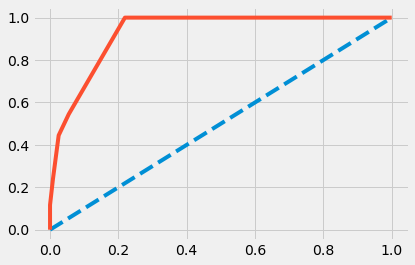

In [557]:
probs_test=KNN_model.predict_proba(x_test1)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test1,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test1,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [558]:
## Ensembed modeling Randomforest

In [559]:
x1 = df_new.drop('Taken_product_Yes', axis = 1)
y1 = df_new['Taken_product_Yes']

In [560]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.33, shuffle = False)

In [578]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, GradientBoostingRegressor

In [579]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train)

C:\Users\DHRUPTI PATEL\AppData\Local\Temp\ipykernel_22144\3106718272.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [582]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
predictions=predictions.reshape(2338, 1)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Taken_product_Yes    0.01
dtype: float64 degrees.


C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [583]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9905902480752781


In [584]:
## variable importances

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x1, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x1: x1[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: yearly_avg_Outstation_checkins Importance: 0.26
Variable: total_likes_on_outstation_checkin_given Importance: 0.21
Variable: Yearly_avg_view_on_travel_page Importance: 0.18
Variable: preferred_location_type Importance: 0.08
Variable: Yearly_avg_comment_on_travel_page Importance: 0.06
Variable: total_likes_on_outofstation_checkin_received Importance: 0.06
Variable: preferred_device_Android Importance: 0.04
Variable: Adult_flag           Importance: 0.03
Variable: Daily_Avg_mins_spend_on_traveling_page Importance: 0.03
Variable: travelling_network_rating Importance: 0.02
Variable: week_since_last_outstation_checkin Importance: 0.01
Variable: montly_avg_comment_on_company_page Importance: 0.01


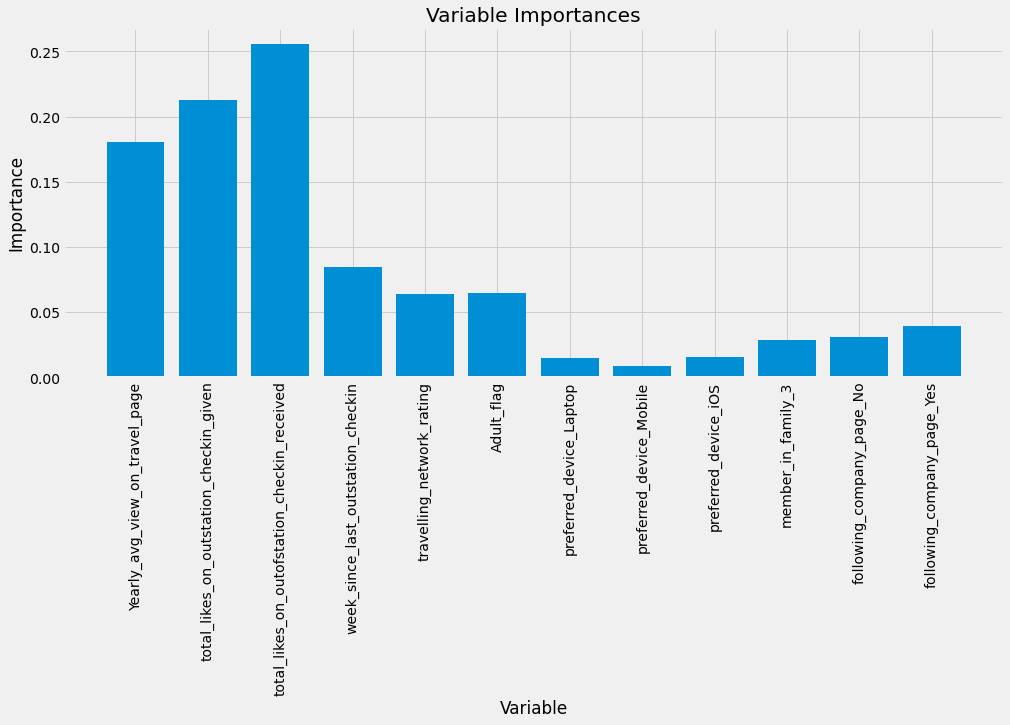

In [586]:
## Visualizations

plt.figure(figsize = (15,6))

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [587]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [601]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart)
Bagging_model.fit(X_train,y_train)
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9995721467536635
[[7822    0]
 [   4 1523]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7822
           1       1.00      1.00      1.00      1527

    accuracy                           1.00      9349
   macro avg       1.00      1.00      1.00      9349
weighted avg       1.00      1.00      1.00      9349



AUC: 1.000


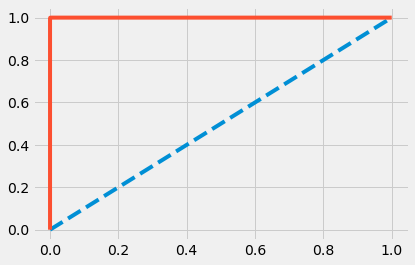

In [591]:
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [592]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9897348160821214
[[1970    5]
 [  19  344]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1975
           1       0.99      0.95      0.97       363

    accuracy                           0.99      2338
   macro avg       0.99      0.97      0.98      2338
weighted avg       0.99      0.99      0.99      2338



AUC: 0.995


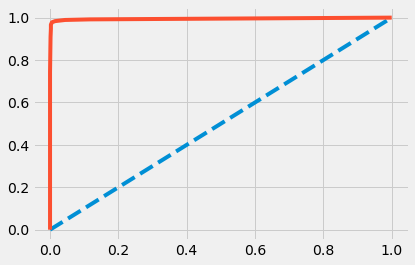

In [593]:
probs_test = Bagging_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [594]:
## Boosting

In [595]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(random_state=1)
ADB_model.fit(X_train,y_train)

C:\Users\DHRUPTI PATEL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=1)

In [596]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8650123007808321
[[7615  207]
 [1055  472]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7822
           1       0.70      0.31      0.43      1527

    accuracy                           0.87      9349
   macro avg       0.79      0.64      0.68      9349
weighted avg       0.85      0.87      0.84      9349



AUC: 0.848


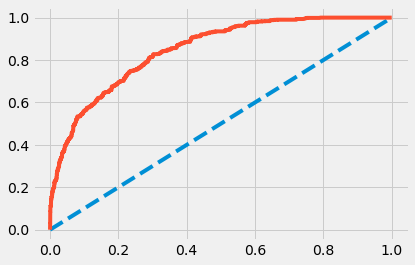

In [597]:
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [598]:
import pickle

In [602]:
# open a file, where you ant to store the data
file = open('baggingclassifier.pkl', 'wb')

# dump information to that file
pickle.dump(Bagging_model, file)